# Machine Learning Lab Enhancement
## Lab01 - Keras with MNIST
### Lab enhancement made by: **Wan Muhammad Atif bin Taram Satiraksa (1211103154)**
### Objectives:
1. Explain what is Neural Networks using easy to understand real world examples.
2. Demonstrate how to build simple Neural Networks using Keras and the MNIST dataset.

# **Neural Networks**
A Neural Network is a computational model that was inspired by biological neural networks and its way of processing information in the human brain. It is a subset of Machine Learning and Articial Intelligence, primarily used for tasks such as image recognition, speech recognition, and decision-making.

Key components of a Neural Network include:
1. **Nodes or Neurons**
  * The basic unit of a neural network, a node is the equivalent of a neuron in the brain.
  * Each node receives input, processes them, and passes the result to the next layer of neurons.
  * A node may also consists of:
    1. Weights
      - Determine the importance of each input in making predictions, adjusted during training to improve accuracy.
    2. Bias
      - A value added to the weighted sum of inputs to help the network adjust its output and better fit the data by shifting the activation function.
    3. Activation function
      - Decides where a neuron's output should proceed to the next layer, enabling the network to learn complex, non-linear patterns.

2. **Layers**
  *   A neural network consist of layers, where each layer houses a varying number of nodes.
  * There are 3 types of layers:
    1. **Input layer**
    
        * The first layer that **receives inputs**.
        * This layer does not process any information but passes the values of its nodes to the next layer.

    2. **Hidden Layers**
        * Layers between the input and the output layers where the majority of the processing occurs.
        * The number of hidden layers differs for each neural network and neural networks with multiple hidden layers are called **Deep Neural Network (DNN).**

    3. **Output Layer**
        * The final layer that **receives and provide the output** through suitable methods.


3. **Connections**
  * Nodes in one layer are inherently connected to neurons in the next layer via edges or weights (does not apply for Output Layer).
  * Each connection has a weight that controls the strength of the signal between neurons.



# **What is Keras?**
Keras is an open source software library that provides easy to use interface for building and training neural networks. It is written in Python, acting as a high level API for creating and experimenting with deep learning models. It is a beginner friendly software, perfect for first time learners in Machine Learning.

# **Example through Analogy**

We can use Keras with MNIST to demonstrate how neural networks work with a real life analogy.
Let's assume you're an experienced baker trying to make a cake (prediction) from his forgotten childhood memory based on grandma's recipe (data inputs) that **did not specify the name of the cake nor the proportions of its ingredients.**

## 1. Input Layer
* The ingredients such as **flour, eggs, and sugar** represent the input data which are the** pixel value of the image of the number**.

## 2. Weights
* Initially, you randomly guess how much of each ingredient is needed. Maybe the first try, you try a mix of 2 cups of flour, 1 cup of sugar and 4 eggs.
* During training of the model, these proportions, called weights are adjusted based on your memory of the taste of the cake (minimizing error).

## 3. Bias
* The oven temperature or baking time can affect the outcome regardless of the ingredients.
* For example, even if combination of adjusted ingredients (weight) are perfect, setting the oven temperature (bias) higher or lower can completely change the cake's final look.
* In this, bias helps shift the weighted combination of inputs, allowing the model to fit the data more accurately.

## 4. Activation Function
* After baking, you check the cake via poking it with a chopstick in the middle to test if its properly cooked or if it needs more adjustment.
* Activation function works as a test to see whether the output can be passed on or not.

##5. Output Layer
* Once the cake is ready and its taste evaluated, the baker can identify what type of cake it is (Vanilla, Chocolate, etc).
* This is reflected in the neural network as it classifying the input (image) into one of several possible categories (digits 0-9 for MNIST)

# Import necessary libraries

In [7]:
from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the MNIST dataset
In this step we load the MNIST dataset (the possible cake names).

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Normalize the pixel values to the range [0, 1]
We ensure that all pixel values (ingredients) are normalized between 0 to 1 for easier processing. This is similar to adjusting the ingredients to it's appropriate measuring metric (cups, teaspoons, etc).

In [9]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Step 3: Build the neural network model
The model will contain an Input and Output layer as well as a variable amount of Hidden Layers that is up to your decision. In this model, there are 128 nodes in the hidden layer an it's activation function is ReLU activation. The output layer contains 10 nodes to represent the digits 0-9.

## Flatten? Dense? Dropout??
There are called Keras layers command which are used to define the architecture of a neural network.

In this example, 3 of the commands are used:
1. Flatten
  - Flatten converts 2D input data (in this case, an image with a 28x28 pixel) into a 1D vector.
2. Dense
  - Dense creates a fully connected layer where each node is connected to every node in the previous layer using the 1D vector outputted by Flatten.
3. Dropout
  - Dropout is used to prevent overfitting by randomly setting to zero a certain percentage of the nodes. 20% of the nodes are dropped in this example.
  - This forces the model to not overly rely on any single node and helps generalize better to new data.

There are many other Keras Layers command which can be found at the [Keras 3 API Documentation](https://keras.io/api/layers/)


In [10]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                   # Dropout layer for regularization (20% dropout rate)
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit 0-9)
])

## What about activation?
That is the activation function. As mentioned before, it is a mathematical operation applied to the output of a node in a neural network to introduce non-linearity into the model that helps the neural networks to learn complex patterns in data.

Examples of common activation functions:
1. ReLU **(used in this example)**
2. Softmax
3. Sigmoid
4. Tanh

More activation functions and its description can be found at [Keras 3 API Documentation](https://keras.io/api/layers/activations/)

# Step 4: Compile the model
This is where you finalize how to train your neural network. Pick an optimizer and a loss function to improve how well the cake turns out based on the recipe.

## Optimizers, loss function, metrics?
  1. Optimizers
    - Method used to adjust the model's weights to minimize the loss function
    - It is critical in training deep learning models as they help improve the model's ability to make predictions over time.
    - Example of Optimizers
      * [Adam](https://keras.io/api/optimizers/adam/) **(used in this example)**
      * [SGD](https://keras.io/api/optimizers/sgd/)
      * [RMSprop](https://keras.io/api/optimizers/rmsprop/)
      * [Adagrad](https://keras.io/api/optimizers/adagrad/)
  2. Loss function
    - Measures how far the model's prediction are from the actual results.
    - During model training, the objective is to minimze the loss function to improve the model's accuracy
    - Example of Loss Function
      * [Sparse Categorical Cross-Entropy](https://) **(used in this example)**
      * [Categorical Cross-Entropy](https://)
      * [Mean Squared Error](https://) (MSE)
      * [Binary Cross-Entropy](https://)
      
  3. Metrics
    - Used to monitor the performance of the model during training and testing.
    - Provides a way to track how the model is performing on the task at hand.
    - Examples of Metrics
      * [Accuracy](https://keras.io/api/metrics/accuracy_metrics/#accuracy-class) **(used in this code)**
      * [Precision](https://keras.io/api/metrics/classification_metrics/#precision-class)
      * [Recall](https://keras.io/api/metrics/classification_metrics/#recall-class)
      * [AUC (Area Under the Curve)](https://keras.io/api/metrics/classification_metrics/#auc-class)

In [11]:
model.compile(optimizer= Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
Now you start baking the cake (training the model). You follow the recipe and adjust the ingredients as needed in each step based on feedback from the previous attempts (training epochs). Each attempts helps you estimate the correct cake (predicting the correct digit). The accuracy of your estimates increases with more attempts done.

In [12]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8606 - loss: 0.4838
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9572 - loss: 0.1446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9674 - loss: 0.1082
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9743 - loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9788 - loss: 0.0694


# Step 6: Evaluate the model on the test data
After baking the cake, you do a final taste test (evaluation) which helps in determining how well your cake turned out by comparing it to what you expected (the actual labels in the test data). By testing the model on a test data it has never seen before, you're testing if the model holds true even when used outside its training environment.

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9714 - loss: 0.0873
Test accuracy: 0.9765999913215637


# Step 7: Make predictions on the test set
The chef now predicts what type of cake it is on the assumption that the cake isn't a new unique cake. This is reflected here be randomly choosing an image from the test set and testing it against the model.

In [14]:
random_index = np.random.randint(0, len(X_test))
predicted_label = model.predict(X_test[random_index:random_index+1])
predicted_digit = predicted_label.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


# Step 8: Display a sample prediction


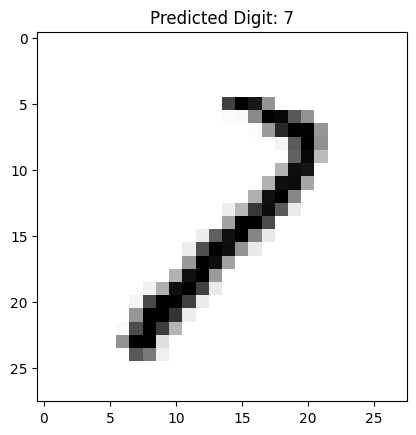

In [15]:
plt.imshow(X_test[random_index], cmap=plt.cm.binary)
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()

# Additional Exercises (Future Work)
To further enhance understanding, consider the following exercises:

1. Experiment with Different Architectures:

    * Modify the number of hidden layers and neurons.

    * Observe the impact on accuracy and training time.

2. Try Different Activation Functions:

    * Replace ReLU with Sigmoid or Tanh in the hidden layers.

    * Compare performance differences in accuracy.

3. Optimize Hyperparameters:

    * Experiment with different optimizers (SGD, RMSprop, Adamax).

    * Tune **learning rates** (eg., 0.01, 0.001, 0.0001), **batch sizes** (e.g., 32,64,128), and **dropout rates** (e.g., 0.2, 0.5) and find the optimal setting.
4. Train on a Custom Dataset:

    * Replace MNIST with Fashion-MNIST by replacing mnist.load_data() with fashion_mnist.load_data().


